# Sampling Frequencies of Cleaned CHARTEVENTS

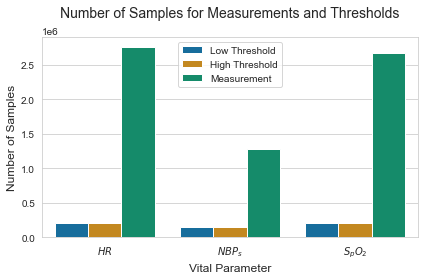

,ITEMID,Number of Samples,Category,Vital Parameter
2,220047.0,215789,Low Threshold,$HR$
1,220046.0,215643,High Threshold,$HR$
0,220045.0,2761421,Measurement,$HR$
7,223752.0,154424,Low Threshold,$NBP_s$
6,223751.0,154314,High Threshold,$NBP_s$
3,220179.0,1288822,Measurement,$NBP_s$
9,223770.0,213196,Low Threshold,$S_pO_2$
8,223769.0,212188,High Threshold,$S_pO_2$
5,220277.0,2669594,Measurement,$S_pO_2$
4,220180.0,1288254,NaN,NaN


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Read cleaned chart events
chartevents_clean = pd.read_parquet('../../data/chartevents_clean.parquet', engine='pyarrow')

# Prepare plot data
plotdata = chartevents_clean\
    .groupby(['ITEMID'])\
    .size()\
    .reset_index(name='Number of Samples')
plotdata.sort_values(by=['Number of Samples'], inplace=True)

# Add column for category (hue)
plotdata.insert(loc=len(plotdata.columns), column='Category', value=np.nan)
plotdata.loc[plotdata['ITEMID'].isin([220045, 220179, 220277]), 'Category'] = 'Measurement'
plotdata.loc[plotdata['ITEMID'].isin([220046, 223751, 223769]), 'Category'] = 'High Threshold'
plotdata.loc[plotdata['ITEMID'].isin([220047, 223752, 223770]), 'Category'] = 'Low Threshold'

# Add column for parameter (x-axis label)
plotdata.insert(loc=len(plotdata.columns), column='Vital Parameter', value=np.nan)
plotdata.loc[plotdata['ITEMID'].isin([220045, 220046, 220047]), 'Vital Parameter'] = '$HR$'
plotdata.loc[plotdata['ITEMID'].isin([220179, 223751, 223752]), 'Vital Parameter'] = '$NBP_s$'
plotdata.loc[plotdata['ITEMID'].isin([220277, 223769, 223770]), 'Vital Parameter'] = '$S_pO_2$'

sorter = ['Low Threshold', 'High Threshold', 'Measurement']
sorterIndex = dict(zip(sorter, range(len(sorter))))
plotdata['Category_Rank'] = plotdata['Category'].map(sorterIndex)
plotdata.sort_values(['Vital Parameter', 'Category_Rank'] ,inplace=True)
plotdata.drop('Category_Rank', 1, inplace = True)

# Actual plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, figsize=(6, 4))
g = sns.barplot(
    ax=ax,
    data=plotdata,
    x='Vital Parameter',
    y='Number of Samples',
    hue='Category',
    palette=sns.color_palette('colorblind'))

# Adjust texts and layout
ax.set_title('Number of Samples for Measurements and Thresholds', fontsize=14, pad=20)
ax.set_xlabel('Vital Parameter', fontsize=12)
ax.set_ylabel('Number of Samples', fontsize=12)
g.get_legend().set_title(None)
plt.tight_layout()

# Show plot and actual numbers
plt.show(fig)
#fig.savefig('../../plots/paper_sampling_frequencies_clean_chartevents.pdf')
plotdata